## hw_4_2

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = "category_data.csv"
df = pd.read_csv(file_path)  # CSV 파일을 불러옵니다.

# 데이터 확인
df.head()  # 상위 5개 행 출력

,Category,Value,Subcategory
0,C,63,X
1,D,18,X
2,A,90,Y
3,C,44,Y
4,C,34,Y


In [3]:
df.info()  # 데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     100 non-null    object
 1   Value        100 non-null    int64 
 2   Subcategory  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [4]:
df.describe()  # 기초 통계 확인

,Value
count,100.00000
mean,49.75000
std,29.45271
min,1.00000
25%,26.75000
50%,46.00000
75%,77.25000
max,99.00000


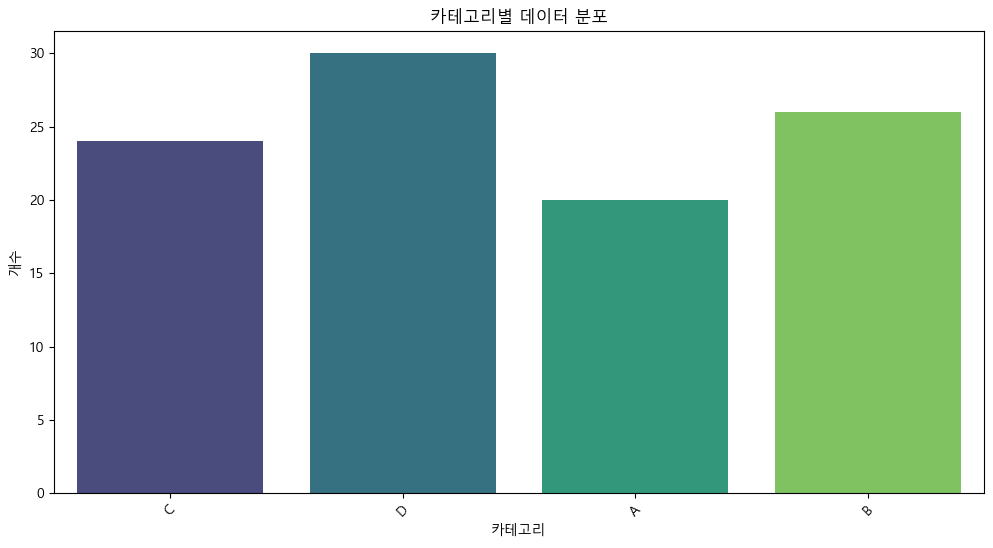

In [5]:
# ==========================
# 1. 카테고리별 데이터 분포 시각화 (Bar Chart)
# ==========================

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.countplot(data=df, x='Category', palette='viridis')  # 카테고리별 개수를 시각화합니다.
plt.title('카테고리별 데이터 분포')  # 그래프 제목 추가
plt.xticks(rotation=45)  # X축 라벨 가독성을 위해 회전 적용
plt.xlabel('카테고리')  # X축 제목 설정
plt.ylabel('개수')  # Y축 제목 설정
plt.show()  # 그래프 표시

# **해석**
# - 데이터가 각 카테고리에 어떻게 분포하는지 한눈에 파악할 수 있습니다.
# - 특정 카테고리에 데이터가 치우쳐 있거나 부족한 경우 데이터 수집 전략을 조정할 필요가 있습니다.

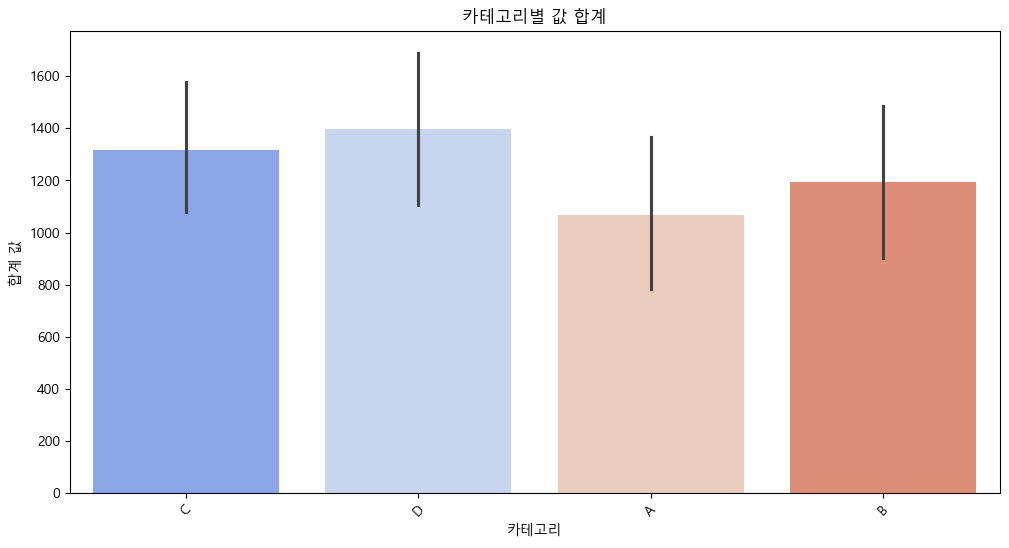

In [6]:
# ==========================
# 2. 카테고리별 수치 데이터 평균 비교 (Bar Chart)
# ==========================

if 'Value' in df.columns:  # '값' 컬럼이 존재하는 경우
    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    sns.barplot(data=df, x='Category', y='Value', estimator=sum, palette='coolwarm')  # 특정 값의 합계를 비교
    plt.title('카테고리별 값 합계')  # 그래프 제목 추가
    plt.xticks(rotation=45)  # X축 라벨 회전
    plt.xlabel('카테고리')  # X축 제목 설정
    plt.ylabel('합계 값')  # Y축 제목 설정
    plt.show()  # 그래프 표시

    # **해석**
    # - 각 카테고리에서 총합을 비교하여 상대적인 중요도를 파악 가능합니다.
    # - 특정 카테고리의 값이 유난히 크거나 작은 경우 데이터 이상치를 검토해야 합니다.

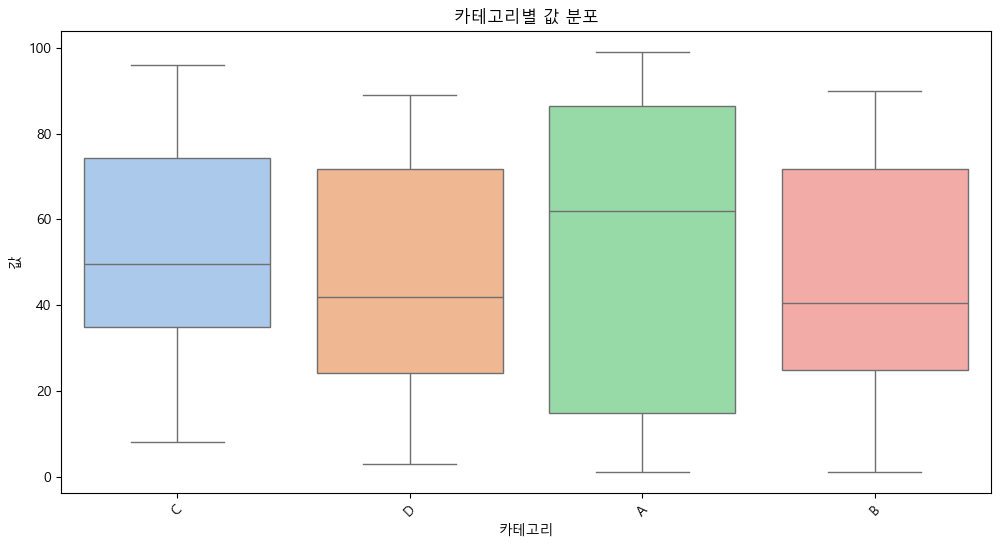

In [7]:
# ==========================
# 3. 카테고리별 분포 (Boxplot)
# ==========================

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
sns.boxplot(data=df, x='Category', y='Value', palette='pastel')  # 박스플롯을 통해 분포를 확인
plt.title('카테고리별 값 분포')  # 그래프 제목 추가
plt.xticks(rotation=45)  # X축 라벨 회전
plt.xlabel('카테고리')  # X축 제목 설정
plt.ylabel('값')  # Y축 제목 설정
plt.show()  # 그래프 표시

# **해석**
# - 각 카테고리별 값의 중앙값, 범위 및 이상치를 시각적으로 확인할 수 있습니다.
# - 특정 카테고리에서 이상치가 많이 발견된다면 데이터 정제 작업이 필요할 수 있습니다.

## hw_4_4

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 불러오기
file_path = "statistical_data.csv"
df = pd.read_csv(file_path)  # CSV 파일을 불러옵니다.

# 데이터 확인
df.head()  # 데이터의 상위 5개 행 출력

,변수1,변수2,Group
0,40.615756,84.243129,G2
1,42.163078,57.119014,G2
2,50.195508,62.560821,G3
3,55.666544,50.373233,G1
4,50.942369,37.038902,G2


In [9]:
df.info()  # 데이터 타입 및 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변수1     300 non-null    float64
 1   변수2     300 non-null    float64
 2   Group   300 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()  # 기초 통계량 확인

,변수1,변수2
count,300.000000,300.000000
mean,49.409910,60.993588
std,15.928850,21.400651
min,-0.461433,4.307287
25%,38.988939,46.297756
50%,49.952510,61.318249
75%,61.434477,76.284587
max,97.805500,119.523939


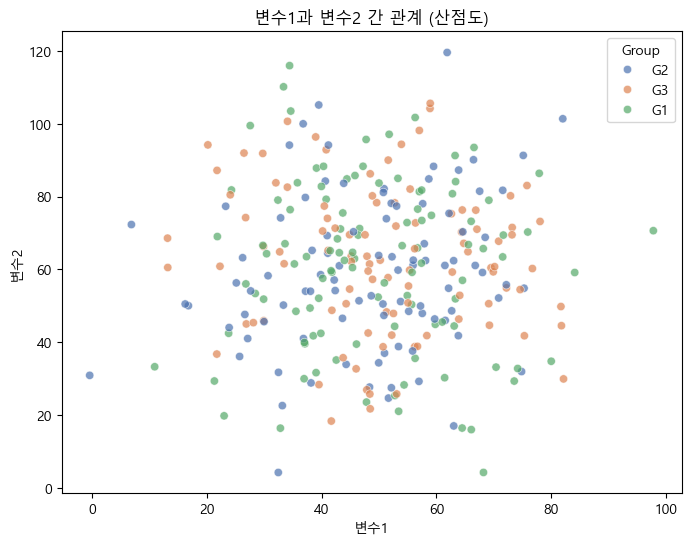

In [11]:
### 1. 변수 간 관계를 산점도로 시각화 ###
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.scatterplot(x=df['변수1'], y=df['변수2'], hue=df['Group'], palette="deep", alpha=0.7)
plt.title("변수1과 변수2 간 관계 (산점도)")  # 그래프 제목 설정
plt.xlabel("변수1")  # X축 제목 설정
plt.ylabel("변수2")  # Y축 제목 설정
plt.legend(title="Group")  # 범례 설정
plt.show()  # 그래프 출력

# 해석:
# - 변수1과 변수2 간의 관계를 확인
# - 그룹별로 다른 색을 사용하여 분포를 구분
# - 상관 관계가 있는지 시각적으로 확인 가능

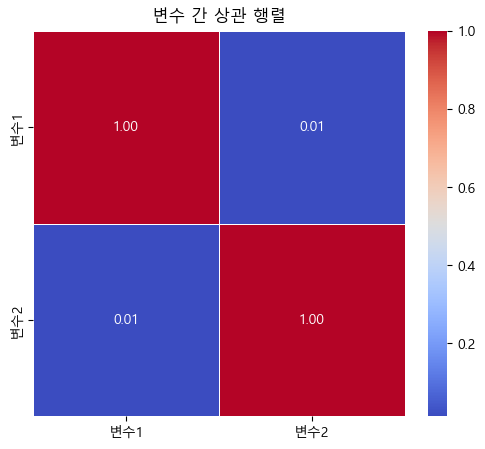

In [12]:
### 2. 변수 간 상관 행렬 및 히트맵 ###
correlation_matrix = df[['변수1', '변수2']].corr()  # 상관 행렬 계산

plt.figure(figsize=(6, 5))  # 그래프 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("변수 간 상관 행렬")  # 그래프 제목 설정
plt.show()  # 그래프 출력

# 해석:
# - 변수1과 변수2의 상관 계수를 확인
# - 1에 가까울수록 양의 상관관계, -1에 가까울수록 음의 상관관계
# - 0에 가까우면 상관성이 낮음

In [ ]:
### 3. 변수 간 관계를 그룹별로 시각화 (페어플롯) ###
sns.pairplot(df, hue="Group", palette="deep", diag_kind="hist")  # 그룹별 변수 간 관계 시각화
plt.show()  # 그래프 출력

# 해석:
# - 여러 변수 간의 관계를 한눈에 보기 위한 시각화 기법
# - 같은 변수 간의 히스토그램을 대각선(diagonal)에 표시
# - 산점도와 히스토그램을 함께 제공하여 데이터 패턴을 쉽게 파악 가능

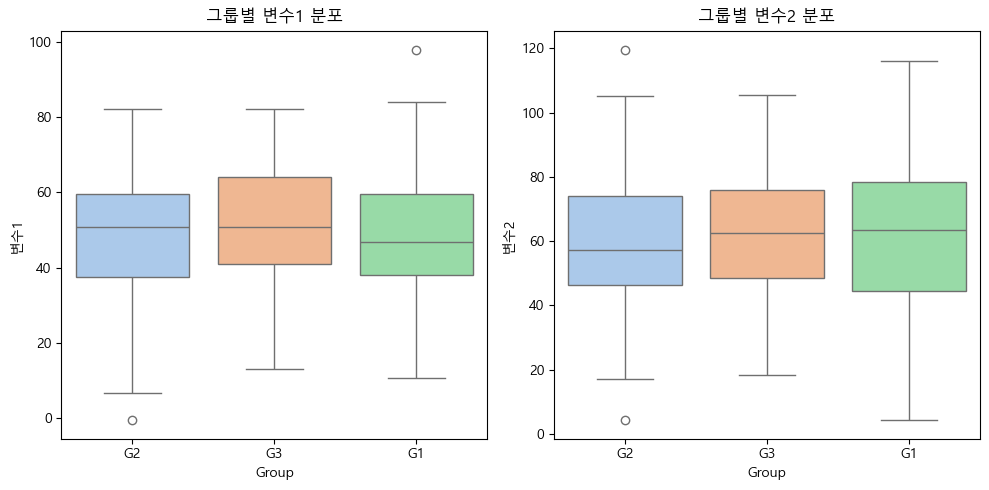

In [17]:
### 4. 그룹별 변수1과 변수2의 분포 비교 (박스플롯) ###
plt.figure(figsize=(10, 5))  # 그래프 크기 설정

plt.subplot(1, 2, 1)  # 첫 번째 서브플롯
sns.boxplot(x="Group", y="변수1", data=df, palette="pastel")
plt.title("그룹별 변수1 분포")  # 첫 번째 플롯 제목

plt.subplot(1, 2, 2)  # 두 번째 서브플롯
sns.boxplot(x="Group", y="변수2", data=df, palette="pastel")
plt.title("그룹별 변수2 분포")  # 두 번째 플롯 제목

plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 출력

# 해석:
# - 그룹별 변수1과 변수2의 중앙값, 사분위 범위, 이상치를 확인
# - 박스 안은 IQR(Interquartile Range, 사분위 범위)
# - 수염(whisker)은 데이터 분포의 범위를 나타냄
# - 박스 밖 점들은 이상치(Outliers)를 의미할 수 있음